In [1]:
from dbhelper import PgDB, pd_query
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
query = '''
        select 
            d.date, 
            baker.snow24 as baker_snow, 
            baker.basedepth as baker_base,
            whistler.snow24 as whistler_snow, 
            whistler.basedepth as whistler_base
        from datefeatures d 
        left join skiconditions baker on d.date::timestamp::date = baker.date and baker.resort='baker'
        left join skiconditions whistler on d.date::timestamp::date = whistler.date and whistler.resort='whistler'
        where hour = 0
        and minute = 0
        order by d.date
        '''

# query = '''
#         select date
#         from datefeatures d
#         where hour = 0
#         and minute = 0
#         order by date
#         '''

df = pd_query(query).set_index('date')

In [55]:
df.head()

,baker_snow,baker_base,whistler_snow,whistler_base
date,,,,
2007-01-01,NaN,NaN,1,79
2007-01-02,7,135,28,100
2007-01-03,3,133,9,98
2007-01-04,12,133,2,79
2007-01-05,NaN,NaN,1,98


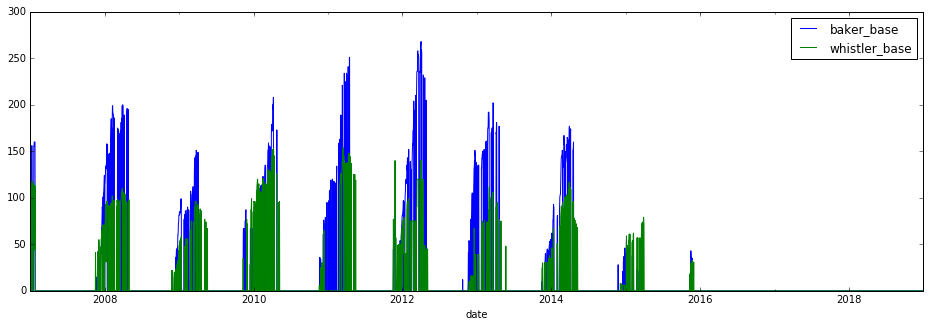

In [56]:
df[['baker_base', 'whistler_base']].fillna(0).plot(figsize=(16,5));

In [59]:
df[df.baker_base == 0]

,baker_snow,baker_base,whistler_snow,whistler_base
date,,,,
2007-10-04,20,0,NaN,NaN
2007-11-12,4,0,NaN,NaN


## Baker zeros are real values for beginning of season

In [71]:
df[df.index<'2007-11-12'].tail(5)

,baker_snow,baker_base,whistler_snow,whistler_base,baker_delta,whistler_delta,baker_yesterday,whistler_yesterday
date,,,,,,,,
2007-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-11,NaN,NaN,NaN,NaN,NaN,NaN,-4,NaN


In [60]:
df[df.whistler_base == 0]

,baker_snow,baker_base,whistler_snow,whistler_base
date,,,,
2007-11-15,NaN,NaN,4,0
2007-11-18,NaN,NaN,4,0
2007-12-02,9,34,6,0
2009-11-09,NaN,NaN,4,0
2009-11-10,NaN,NaN,4,0
2009-11-12,6,67,12,0
2009-11-14,NaN,NaN,2,0
2009-11-16,7,67,20,0
2009-11-17,7,67,27,0


* 12/6/2014 - 4/1/2015


In [82]:
df[df.index<'2014-12-11'].tail(20)

,baker_snow,baker_base,whistler_snow,whistler_base,baker_delta,whistler_delta,baker_yesterday,whistler_yesterday
date,,,,,,,,
2014-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5
2014-11-23,NaN,NaN,5,0,NaN,-5,NaN,-4
2014-11-24,NaN,NaN,4,0,NaN,-4,20,-6
2014-11-25,8,28,6,0,20,-6,NaN,-8
2014-11-26,NaN,NaN,8,0,NaN,-8,NaN,NaN
2014-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
2014-11-29,NaN,NaN,2,0,NaN,-2,NaN,NaN


## Ski condition data needs to be imputed for days without snowfall
1. Set basedepth between seasons to zero to indicate closure
2. Remove zero basedepth
3. Impute data between snowfalls
    1. First set basedepth for day before snowfall
    2. Then use linear interpolate in gaps

In [61]:
df['baker_delta'] = df.baker_base-df.baker_snow
df['whistler_delta'] = df.whistler_base-df.whistler_snow

In [18]:
df.yesterday.head()

date
2006-01-01    47
2006-01-02    57
2006-01-03    58
2006-01-04    56
2006-01-05    70
Name: yesterday, dtype: float64

In [63]:
df['baker_yesterday'] = df.baker_delta.shift(-1)
df['whistler_yesterday'] = df.whistler_delta.shift(-1)

In [64]:
df.head()

,baker_snow,baker_base,whistler_snow,whistler_base,baker_delta,whistler_delta,baker_yesterday,whistler_yesterday
date,,,,,,,,
2007-01-01,NaN,NaN,1,79,NaN,78,128,72
2007-01-02,7,135,28,100,128,72,130,89
2007-01-03,3,133,9,98,130,89,121,77
2007-01-04,12,133,2,79,121,77,NaN,97
2007-01-05,NaN,NaN,1,98,NaN,97,143,87


In [ ]:
df[df.baker_base == 0].

In [21]:
query = '''
        select
            m.date,
            metric as waittime,
            year,
            month,
            week,
            dayofweek,
            baker.basedepth
        from mungedata m
        join datefeatures d on m.date = d.date
        left join skiconditions baker on m.date::timestamp::date = baker.date and resort='baker'
        where crossing_id = 1
        and munger_id=2
        and (minute = 0 or minute = 30)
        and is_waittime = true
        '''

dfx = pd_query(query)

In [22]:
dfx.head()

,date,waittime,year,month,week,dayofweek,basedepth
0,2007-01-01 00:00:00,0.000000,2007,1,1,0,NaN
1,2007-01-01 07:00:00,0.759009,2007,1,1,0,NaN
2,2007-01-01 02:00:00,0.121443,2007,1,1,0,NaN
3,2007-01-01 01:00:00,0.113590,2007,1,1,0,NaN
4,2007-01-01 07:30:00,2.710230,2007,1,1,0,NaN
